In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('fcc-forum-pageviews.csv')

In [5]:
df.head(100)

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
95,2016-08-12,29488
96,2016-08-13,26206
97,2016-08-14,29686
98,2016-08-15,32229


In [6]:
df.shape

(1304, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1304 non-null   object
 1   value   1304 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.5+ KB


In [8]:
df['date'] = pd.to_datetime(df['date'])


In [9]:
df.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [10]:
df.set_index('date', inplace=True)

In [11]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [12]:
q1 = df['value'].quantile(0.025)
q3 = df['value'].quantile(0.975)
outliers = (df['value'] < q1) | (df['value'] > q3)
df['outliers']=outliers

In [13]:
df.head()

,value,outliers
date,,
2016-05-09,1201,True
2016-05-10,2329,True
2016-05-11,1716,True
2016-05-12,10539,True
2016-05-13,6933,True


In [17]:
df_reset = df.reset_index()

In [18]:
df_reset.head()

,date,value,outliers
0,2016-05-09,1201,True
1,2016-05-10,2329,True
2,2016-05-11,1716,True
3,2016-05-12,10539,True
4,2016-05-13,6933,True


In [19]:
df['outliers'].head(100)

date
2016-05-09     True
2016-05-10     True
2016-05-11     True
2016-05-12     True
2016-05-13     True
              ...  
2016-08-12    False
2016-08-13    False
2016-08-14    False
2016-08-15    False
2016-08-16    False
Name: outliers, Length: 100, dtype: bool

In [21]:

df_reset.rename(columns={'value': 'page_views'}, inplace=True)


In [22]:
df_reset

,date,page_views,outliers
0,2016-05-09,1201,True
1,2016-05-10,2329,True
2,2016-05-11,1716,True
3,2016-05-12,10539,True
4,2016-05-13,6933,True
...,...,...,...
1299,2019-11-29,171584,False
1300,2019-11-30,141161,False
1301,2019-12-01,142918,False
1302,2019-12-02,220144,True


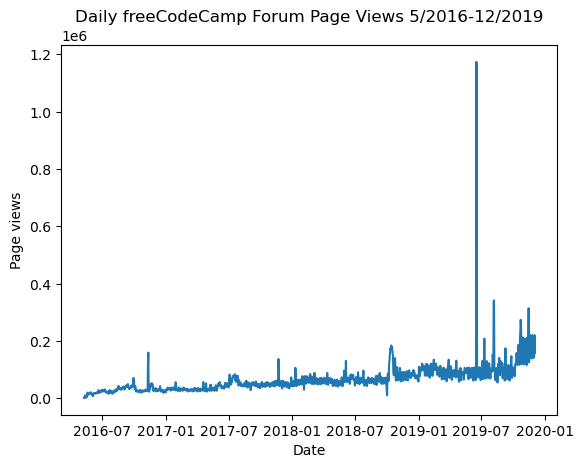

<Figure size 2e+06x2e+06 with 0 Axes>

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


fig=sns.lineplot(data=df_reset, x='date', y='page_views')


plt.xlabel('Date')
plt.ylabel('Page views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')




# Show the plot

plt.figure(figsize=(20000,20000))

# Display the plot
plt.show()



In [50]:
df_reset['date']

0      2016-05-09
1      2016-05-10
2      2016-05-11
3      2016-05-12
4      2016-05-13
          ...    
1299   2019-11-29
1300   2019-11-30
1301   2019-12-01
1302   2019-12-02
1303   2019-12-03
Name: date, Length: 1304, dtype: datetime64[ns]

In [52]:
df_reset['year_month'] = df_reset['date'].dt.to_period('M')

In [53]:
df_reset.head()

,date,page_views,outliers,year_month
0,2016-05-09,1201,True,2016-05
1,2016-05-10,2329,True,2016-05
2,2016-05-11,1716,True,2016-05
3,2016-05-12,10539,True,2016-05
4,2016-05-13,6933,True,2016-05


In [55]:
df_grouped = df_reset.groupby('year_month')

In [56]:
df_reset.head()

,date,page_views,outliers,year_month
0,2016-05-09,1201,True,2016-05
1,2016-05-10,2329,True,2016-05
2,2016-05-11,1716,True,2016-05
3,2016-05-12,10539,True,2016-05
4,2016-05-13,6933,True,2016-05


In [67]:
df_grouped = df_reset.groupby('year_month')

In [83]:
df_reset.head()

,date,page_views,outliers,year_month,page_avg
0,2016-05-09,1201,True,2016-05,67220.683282
1,2016-05-10,2329,True,2016-05,67220.683282
2,2016-05-11,1716,True,2016-05,67220.683282
3,2016-05-12,10539,True,2016-05,67220.683282
4,2016-05-13,6933,True,2016-05,67220.683282


In [84]:
# Assuming df is your DataFrame and 'column_name' is the column you want to delete
df_reset.drop('page_avg', axis=1, inplace=True)


In [134]:
df_reset.head()

,date,page_views,outliers,year_month,month,year
1060,2019-04-04,112045,False,2019-04,April,2019
694,2018-04-03,70500,False,2018-04,April,2018
693,2018-04-02,66957,False,2018-04,April,2018
692,2018-04-01,56224,False,2018-04,April,2018
327,2017-04-01,23762,False,2017-04,April,2017


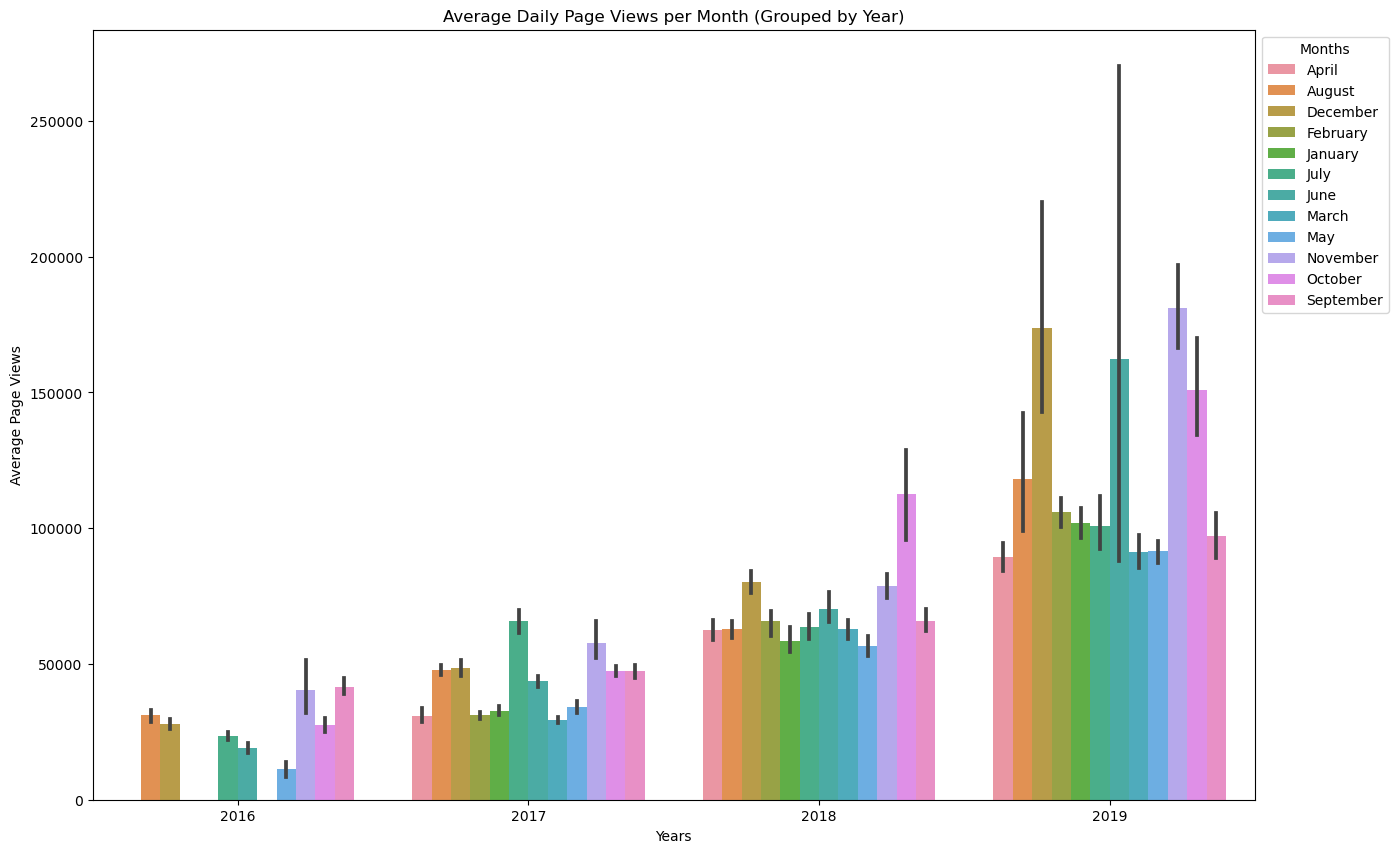

In [135]:
df_reset['month'] = pd.to_datetime(df_reset['date']).dt.month_name()

df_reset['year'] = pd.to_datetime(df_reset['date']).dt.year

plt.figure(figsize=(15, 10))
sns.barplot(data=df_reset,hue='month',x='year',y='page_views')  
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.title('Average Daily Page Views per Month (Grouped by Year)')


plt.legend(title='Months', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

,date,page_views,outliers,year_month,month,year
1060,2019-04-04,112045,False,2019-04,April,2019
694,2018-04-03,70500,False,2018-04,April,2018
693,2018-04-02,66957,False,2018-04,April,2018
692,2018-04-01,56224,False,2018-04,April,2018
327,2017-04-01,23762,False,2017-04,April,2017


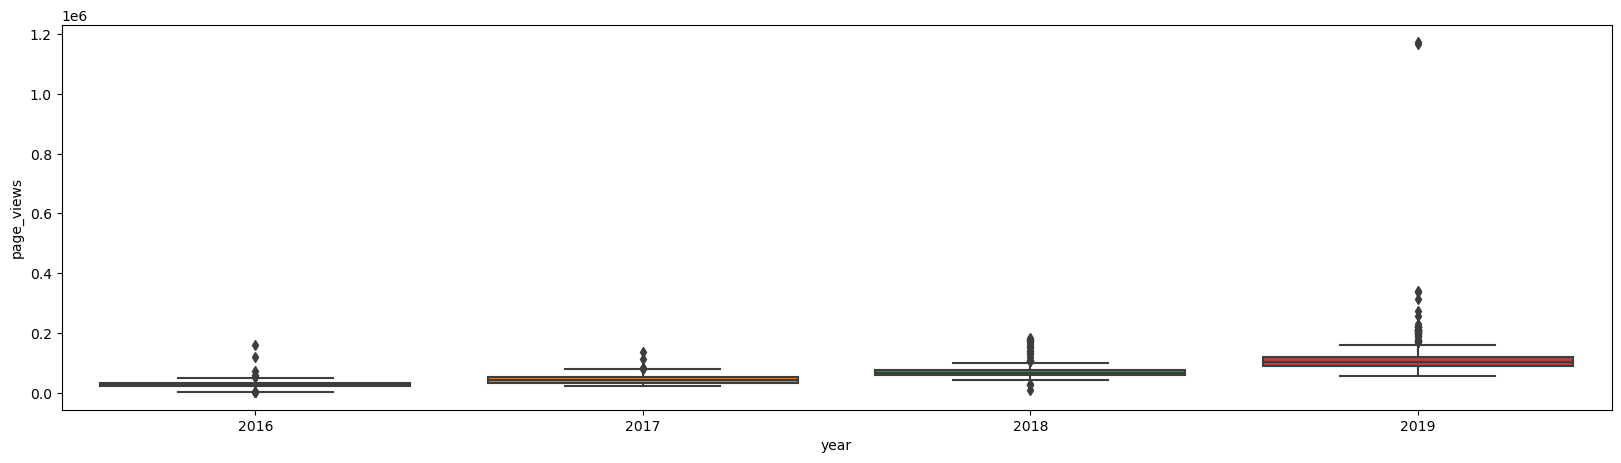

In [154]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df_reset,x='year',y='page_views')


plt.show()